# METHODOLOGY AND EXPERIMENTATION CPI FORECASTING

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#### Read File 

In [3]:
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0],index_col=[0]
                  )
data.head()


,All-items,Food,Shelter,Household operations,Clothing and footwear,Transportation,Gasoline,Health and personal care,Recreation & education,"Alcohol, tobacco & cannabis",All-items excluding food and energy,All-items excluding energy,Energy,Goods,Services
Date,,,,,,,,,,,,,,,
2003-01-01,102.0,101.6,102.1,100.1,96.6,105.5,108.4,100.5,99.3,106.8,101.5,101.5,108.3,101.9,102.1
2003-02-01,102.8,101.5,102.5,100.6,98.7,107.1,116.1,100.8,100.6,108.1,102.1,102.0,113.0,103.0,102.6
2003-03-01,103.1,101.7,103.2,100.6,100.3,107.6,117.2,100.5,100.3,108.3,102.3,102.2,115.3,103.6,102.7
2003-04-01,102.4,101.8,102.3,100.7,98.7,105.4,106.7,101.2,100.0,108.9,102.3,102.2,106.0,101.9,102.9
2003-05-01,102.5,102.1,102.9,100.6,98.3,104.0,99.3,101.4,100.7,110.2,102.5,102.4,103.7,101.8,103.2


#### Get Basic summary stastistics and information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2003-01-01 to 2023-04-01
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   All-items                             244 non-null    float64
 1   Food                                  244 non-null    float64
 2   Shelter                               244 non-null    float64
 3   Household operations                  244 non-null    float64
 4   Clothing and footwear                 244 non-null    float64
 5   Transportation                        244 non-null    float64
 6   Gasoline                              244 non-null    float64
 7   Health and personal care              244 non-null    float64
 8   Recreation & education                244 non-null    float64
 9   Alcohol, tobacco & cannabis           244 non-null    float64
 10  All-items excluding food and energy   244 non-null    float64
 11  

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
All-items,244.0,123.229508,13.362860,102.0,112.175,122.70,133.000,156.4
Food,244.0,132.002459,20.085299,100.7,112.600,131.80,144.700,183.1
Shelter,244.0,129.881148,16.165007,102.1,119.500,127.95,140.075,169.9
Household operations,244.0,114.036885,9.665732,100.1,104.000,114.05,122.725,133.7
Clothing and footwear,244.0,94.535246,2.662912,87.9,92.775,94.65,96.225,100.8
Transportation,244.0,128.072541,15.869033,103.7,116.700,127.35,137.125,176.2
Gasoline,244.0,161.768852,33.503064,99.3,142.525,157.40,183.350,299.4
Health and personal care,244.0,117.973361,10.583401,100.5,107.900,118.40,125.600,145.7
Recreation & education,244.0,108.413115,7.160660,99.1,102.075,106.40,114.500,127.1
"Alcohol, tobacco & cannabis",244.0,144.764754,21.909026,106.8,126.600,139.60,166.475,189.4


In [7]:
#checking for missing values
data.isnull().sum()

All-items                               0
Food                                    0
Shelter                                 0
Household operations                    0
Clothing and footwear                   0
Transportation                          0
Gasoline                                0
Health and personal care                0
Recreation & education                  0
Alcohol, tobacco & cannabis             0
All-items excluding food and energy     0
All-items excluding energy              0
Energy                                  0
Goods                                   0
Services                                0
dtype: int64

In [ ]:
#removing outliers


# PROPOSED MODEL 

### RNN Encoder Decoder Single Head Attention Model

In [8]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, TimeDistributed, Embedding, Flatten, Activation, Concatenate, Dot
from tensorflow.keras.models import Model

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.2)

# Define the model architecture
encoder_inputs = Input(shape=(None, 1))
encoder_lstm = LSTM(180, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None, 1))
decoder_lstm = LSTM(180, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

# Attention mechanism
attention = Dot(axes=[2, 2])([decoder_outputs, encoder_outputs])
attention = Activation('softmax')(attention)

context = Dot(axes=[2, 1])([attention, encoder_outputs])
decoder_combined_context = Concatenate(axis=-1)([context, decoder_outputs])

output = TimeDistributed(Dense(1, activation='linear'))(decoder_combined_context)

model = Model([encoder_inputs, decoder_inputs], output)
model.compile(optimizer='adam', loss='mse')

# Train the model with teacher forcing
encoder_input_train = train_data.values[:-1, :, np.newaxis]
decoder_input_train = train_data.values[1:, :, np.newaxis]
decoder_output_train = train_data.values[1:, :, np.newaxis]

encoder_input_val = val_data.values[:-1, :, np.newaxis]
decoder_input_val = val_data.values[1:, :, np.newaxis]
decoder_output_val = val_data.values[1:, :, np.newaxis]

model.fit(
    [encoder_input_train, decoder_input_train],
    decoder_output_train,
    validation_data=([encoder_input_val, decoder_input_val], decoder_output_val),
    epochs=500,
    batch_size=4
)

# Evaluate the model on the test set
encoder_input_test = test_data.values[:-1, :, np.newaxis]
decoder_input_test = test_data.values[1:, :, np.newaxis]
decoder_output_test = test_data.values[1:, :, np.newaxis]

preds = model.predict([encoder_input_test, decoder_input_test])
predictions = preds.squeeze()
test_values = decoder_output_test.squeeze()

mae = mean_absolute_error(test_values, predictions)
smape = 100 * np.mean(2 * np.abs(predictions - test_values) / (np.abs(predictions) + np.abs(test_values)))
rmse = np.sqrt(mean_squared_error(test_values, predictions))
r2 = r2_score(test_values, predictions)

print("MAE:", mae)
print("SMAPE:", smape)
print("RMSE:", rmse)
print("R2 Score:", r2)

Epoch 1/500
39/39 [==============================] - 4s 27ms/step - loss: 15193.3613 - val_loss: 11572.3330
Epoch 2/500
39/39 [==============================] - 0s 12ms/step - loss: 10723.6787 - val_loss: 8149.5757
Epoch 3/500
39/39 [==============================] - 0s 12ms/step - loss: 7782.9639 - val_loss: 5686.3276
Epoch 4/500
39/39 [==============================] - 0s 12ms/step - loss: 5473.3188 - val_loss: 3876.5564
Epoch 5/500
39/39 [==============================] - 0s 12ms/step - loss: 3856.8721 - val_loss: 2659.3240
Epoch 6/500
39/39 [==============================] - 0s 12ms/step - loss: 2741.3459 - val_loss: 1825.5607
Epoch 7/500
39/39 [==============================] - 0s 13ms/step - loss: 1976.4415 - val_loss: 1284.4763
Epoch 8/500
39/39 [==============================] - 1s 14ms/step - loss: 1464.4257 - val_loss: 939.0129
Epoch 9/500
39/39 [==============================] - 0s 12ms/step - loss: 1125.4308 - val_loss: 720.7023
Epoch 10/500
39/39 [=========================

Epoch 80/500
39/39 [==============================] - 1s 13ms/step - loss: 17.5754 - val_loss: 12.4764
Epoch 81/500
39/39 [==============================] - 1s 13ms/step - loss: 17.1977 - val_loss: 12.5894
Epoch 82/500
39/39 [==============================] - 1s 14ms/step - loss: 17.2179 - val_loss: 12.2934
Epoch 83/500
39/39 [==============================] - 1s 14ms/step - loss: 16.5926 - val_loss: 11.9479
Epoch 84/500
39/39 [==============================] - 1s 17ms/step - loss: 16.0970 - val_loss: 11.6004
Epoch 85/500
39/39 [==============================] - 1s 15ms/step - loss: 15.8175 - val_loss: 11.6654
Epoch 86/500
39/39 [==============================] - 1s 14ms/step - loss: 15.5050 - val_loss: 11.6544
Epoch 87/500
39/39 [==============================] - 1s 14ms/step - loss: 15.0695 - val_loss: 10.9041
Epoch 88/500
39/39 [==============================] - 1s 14ms/step - loss: 14.7878 - val_loss: 10.9399
Epoch 89/500
39/39 [==============================] - 0s 13ms/step - loss

39/39 [==============================] - 1s 13ms/step - loss: 2.8063 - val_loss: 2.0633
Epoch 161/500
39/39 [==============================] - 1s 13ms/step - loss: 2.8239 - val_loss: 2.0749
Epoch 162/500
39/39 [==============================] - 1s 14ms/step - loss: 3.1493 - val_loss: 2.1771
Epoch 163/500
39/39 [==============================] - 1s 14ms/step - loss: 2.8433 - val_loss: 2.3807
Epoch 164/500
39/39 [==============================] - 1s 14ms/step - loss: 2.7555 - val_loss: 1.9264
Epoch 165/500
39/39 [==============================] - 1s 13ms/step - loss: 2.6458 - val_loss: 1.8198
Epoch 166/500
39/39 [==============================] - 1s 14ms/step - loss: 2.5471 - val_loss: 1.9005
Epoch 167/500
39/39 [==============================] - 1s 13ms/step - loss: 2.5922 - val_loss: 1.8065
Epoch 168/500
39/39 [==============================] - 1s 13ms/step - loss: 2.5752 - val_loss: 1.8298
Epoch 169/500
39/39 [==============================] - 1s 13ms/step - loss: 2.4342 - val_loss: 1

39/39 [==============================] - 1s 13ms/step - loss: 0.3966 - val_loss: 0.6066
Epoch 321/500
39/39 [==============================] - 1s 13ms/step - loss: 0.3561 - val_loss: 0.1591
Epoch 322/500
39/39 [==============================] - 1s 14ms/step - loss: 0.2047 - val_loss: 0.5274
Epoch 323/500
39/39 [==============================] - 1s 14ms/step - loss: 0.1833 - val_loss: 0.2636
Epoch 324/500
39/39 [==============================] - 1s 16ms/step - loss: 0.1962 - val_loss: 0.2810
Epoch 325/500
39/39 [==============================] - 1s 15ms/step - loss: 0.1892 - val_loss: 0.3185
Epoch 326/500
39/39 [==============================] - 1s 14ms/step - loss: 0.2617 - val_loss: 0.6770
Epoch 327/500
39/39 [==============================] - 1s 13ms/step - loss: 0.8881 - val_loss: 1.5475
Epoch 328/500
39/39 [==============================] - 1s 13ms/step - loss: 2.9179 - val_loss: 0.8439
Epoch 329/500
39/39 [==============================] - 1s 13ms/step - loss: 1.4817 - val_loss: 0

39/39 [==============================] - 1s 14ms/step - loss: 0.0685 - val_loss: 0.0382
Epoch 481/500
39/39 [==============================] - 1s 14ms/step - loss: 0.1330 - val_loss: 0.1364
Epoch 482/500
39/39 [==============================] - 1s 13ms/step - loss: 0.1680 - val_loss: 0.3017
Epoch 483/500
39/39 [==============================] - 1s 14ms/step - loss: 0.3841 - val_loss: 0.6498
Epoch 484/500
39/39 [==============================] - 1s 13ms/step - loss: 0.2497 - val_loss: 0.0738
Epoch 485/500
39/39 [==============================] - 1s 14ms/step - loss: 0.0573 - val_loss: 0.0639
Epoch 486/500
39/39 [==============================] - 1s 14ms/step - loss: 0.0570 - val_loss: 0.1212
Epoch 487/500
39/39 [==============================] - 1s 15ms/step - loss: 0.0501 - val_loss: 0.0747
Epoch 488/500
39/39 [==============================] - 1s 15ms/step - loss: 0.0692 - val_loss: 0.0920
Epoch 489/500
39/39 [==============================] - 1s 15ms/step - loss: 0.1738 - val_loss: 0

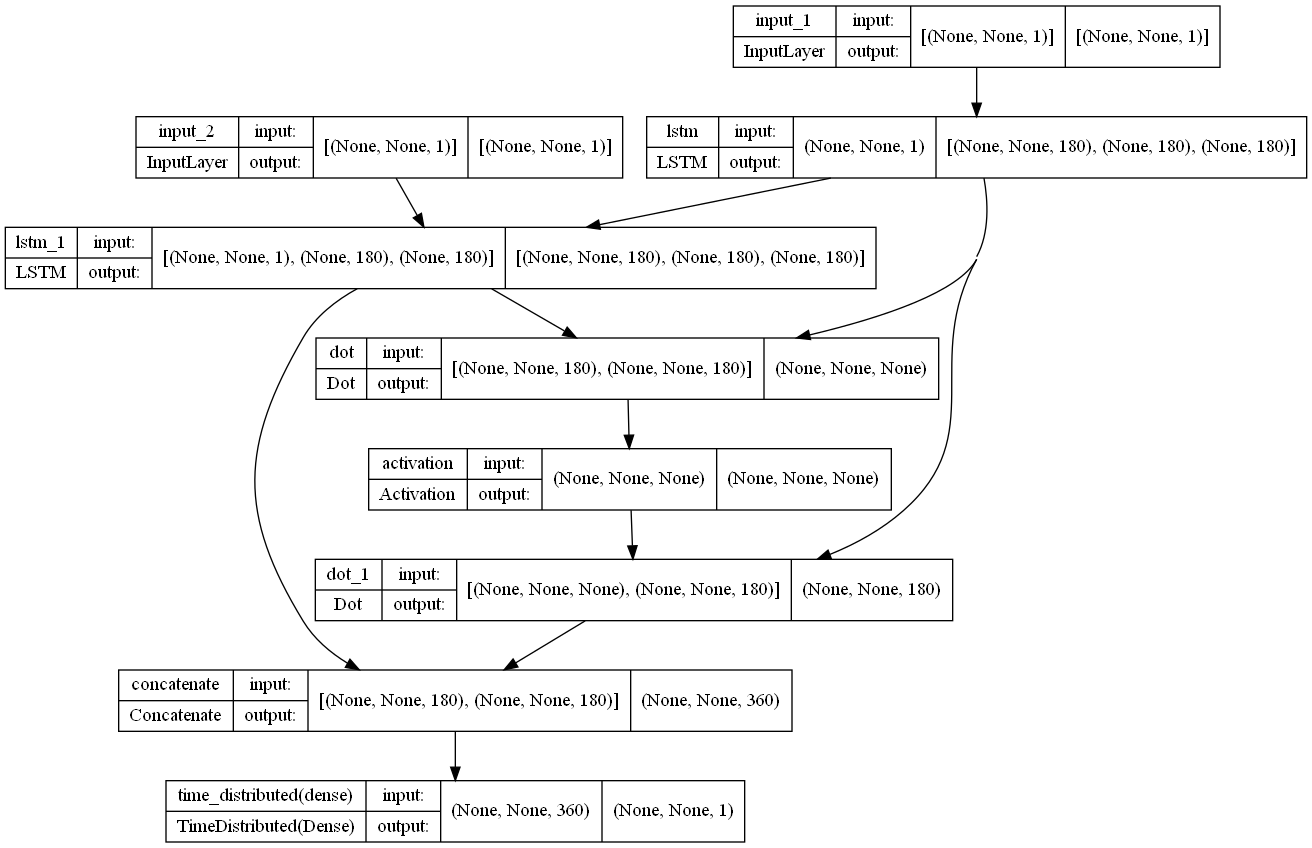

In [9]:
import tensorflow.keras.utils as keras_utils
import keras
import keras.utils
from keras import utils as np_utils
keras_utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)


In [13]:
# Calculate evaluation metrics for each CPI indicator
cpi_indicators = data.columns
eval_metrics = []
for indicator in cpi_indicators:
    test_values_ind = test_data[indicator].values[1:]
    predictions_ind = predictions[:, cpi_indicators.tolist().index(indicator)]
    
    mae_ind = mean_absolute_error(test_values_ind, predictions_ind)
    smape_ind = 100 * np.mean(2 * np.abs(predictions_ind - test_values_ind) / (np.abs(predictions_ind) + np.abs(test_values_ind)))
    rmse_ind = np.sqrt(mean_squared_error(test_values_ind, predictions_ind))
    r2_ind = r2_score(test_values_ind, predictions_ind)
    
    eval_metrics.append([indicator, mae_ind, smape_ind, rmse_ind, r2_ind])

# Create a DataFrame for evaluation metrics
rnn_decoder = pd.DataFrame(eval_metrics, columns=["CPI Indicator", "MAE", "SMAPE", "RMSE", "R2 Score"])

# Print the evaluation metrics DataFrame
print(rnn_decoder)

                           CPI Indicator       MAE     SMAPE      RMSE  \
0                              All-items  0.197009  0.142850  0.437936   
1                                  Food   0.138011  0.101987  0.161524   
2                                Shelter  0.140608  0.109276  0.163271   
3                   Household operations  0.137616  0.123686  0.155238   
4                  Clothing and footwear  0.103751  0.111492  0.153369   
5                         Transportation  0.143888  0.109012  0.186686   
6                               Gasoline  0.293529  0.135658  1.076951   
7               Health and personal care  0.126032  0.107032  0.149622   
8                Recreation & education   0.102690  0.094262  0.111623   
9            Alcohol, tobacco & cannabis  0.111033  0.077413  0.131050   
10  All-items excluding food and energy   0.130271  0.111262  0.142433   
11           All-items excluding energy   0.106983  0.088302  0.118856   
12                                Ener

#### Predicted Outputs 

In [10]:
result_df = pd.DataFrame(columns=['CPI Indicator', 'Actual', 'Predicted'])
for column in data.columns:
    # Prepare the input data for prediction
    input_data = test_data[[column]].values[:-1, :, np.newaxis]
    
    # Predict the values
    predicted_values = model.predict([input_data, input_data])
    
    # Get the actual values
    actual_values = test_data[[column]].values[1:]
    
    # Flatten the arrays for easier comparison
    predicted_values = predicted_values.flatten()
    actual_values = actual_values.flatten()
    
    # Create a DataFrame with the actual and predicted values for the column
    column_df = pd.DataFrame({'CPI Indicator': [column]*len(actual_values),
                              'Actual': actual_values,
                              'Predicted': predicted_values})
    
    # Append the column DataFrame to the result DataFrame
    result_df = result_df.append(column_df, ignore_index=True)
result_df

,CPI Indicator,Actual,Predicted
0,All-items,113.0,112.006981
1,All-items,123.1,110.614403
2,All-items,124.8,111.769493
3,All-items,103.2,111.926979
4,All-items,138.2,108.960205
...,...,...,...
715,Services,157.7,111.623085
716,Services,102.7,113.957909
717,Services,106.2,108.856560
718,Services,106.2,109.539101


# BASELINE COMPARED MODELS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

### Vector Auto Regression Model (VAR)

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


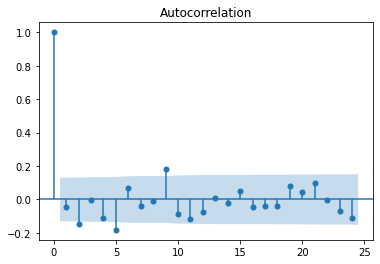

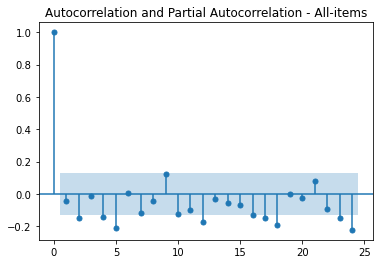

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


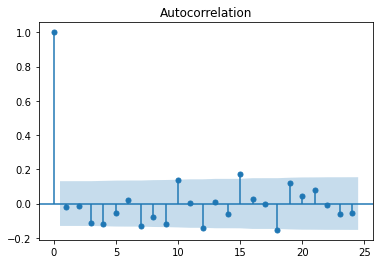

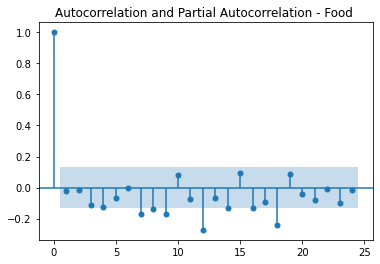

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


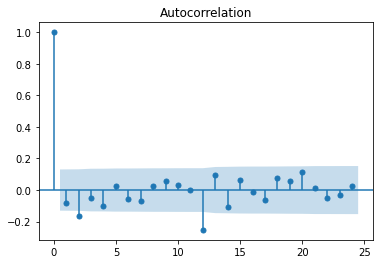

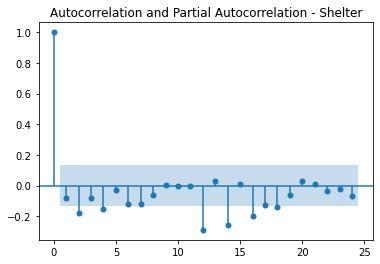

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


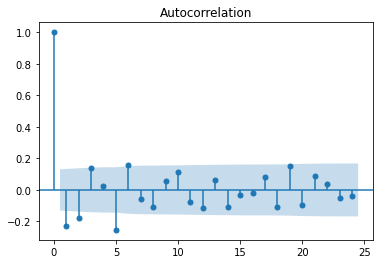

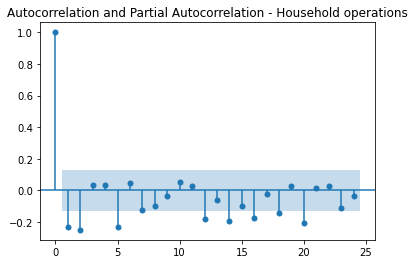

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


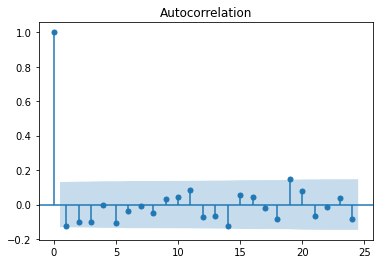

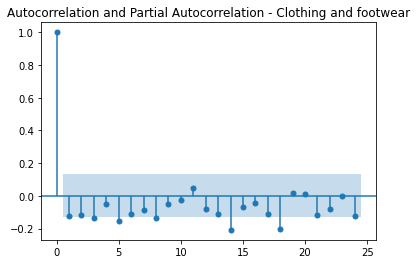

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


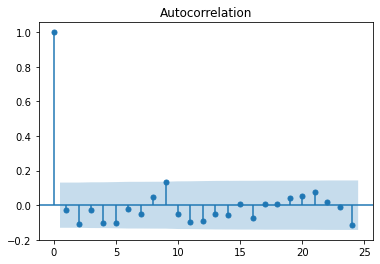

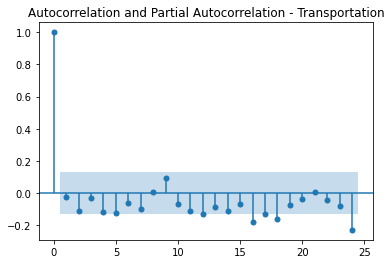

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


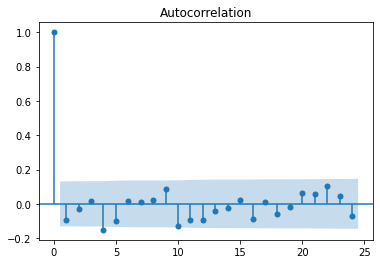

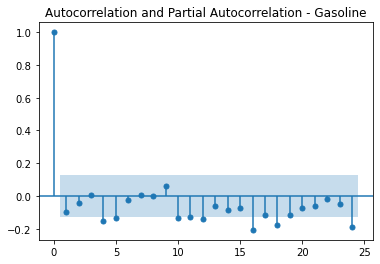

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


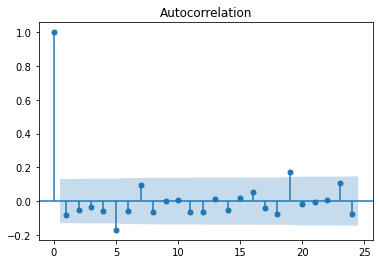

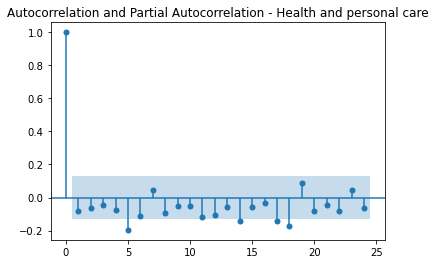

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


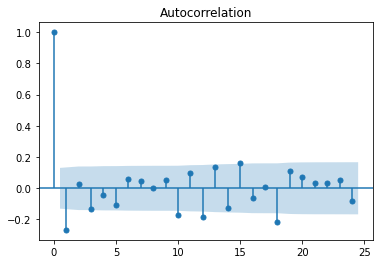

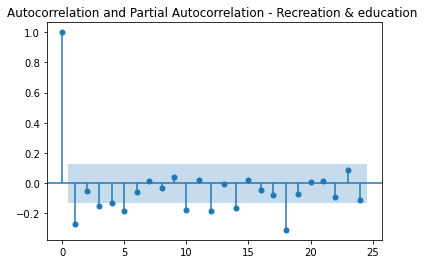

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


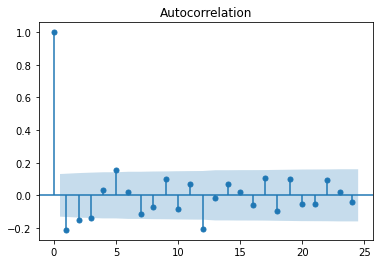

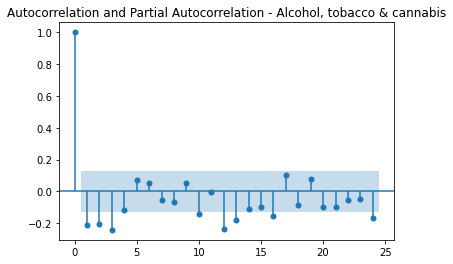

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


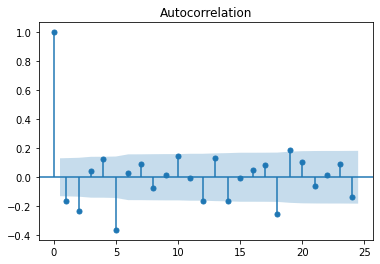

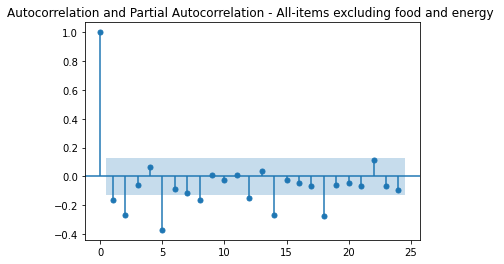

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


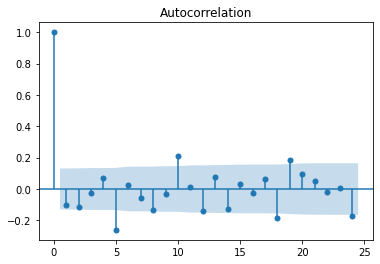

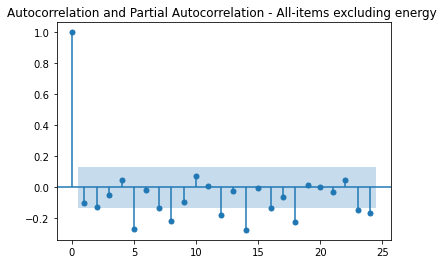

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


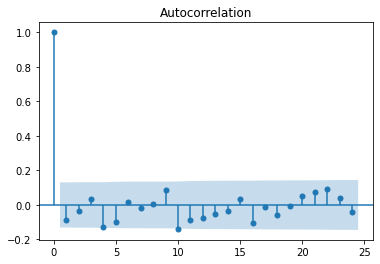

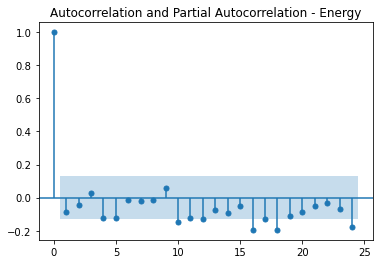

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


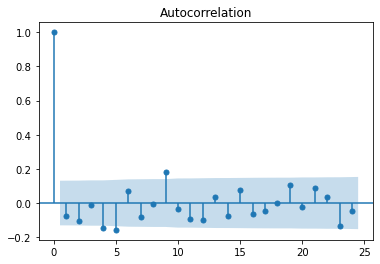

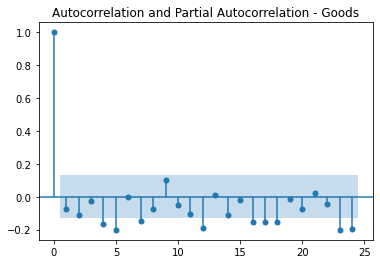

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


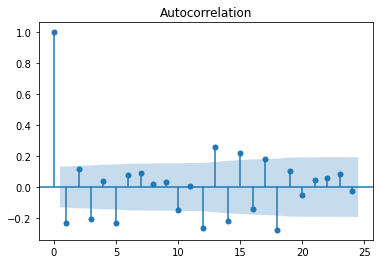

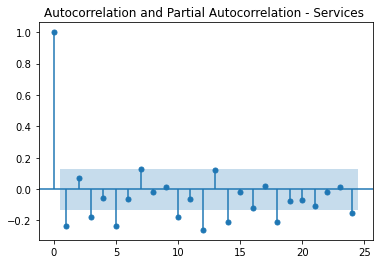

RMSE: 6.425480731555487
MAE: 5.387628744037312
SMAPE: 0.030870369442084575
R2: 0.9107154046128979


C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
#read data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv", parse_dates=[0],index_col=[0]
                  )

#preprocessing 
cpi_components = ['All-items', 'Food ', 'Shelter', 'Household operations', 'Clothing and footwear', 'Transportation', 'Gasoline', 'Health and personal care', 'Recreation & education ', 'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ', 'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
data[cpi_components] = data[cpi_components].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

train_data = data.iloc[:-6]  # Use all but the last 6 months for training (changed traing, test size)
test_data = data.iloc[-6:]  # Use the last 6 months for testing
from statsmodels.tsa.vector_ar.var_model import VAR
#Estimate the VAR model
model = VAR(train_data)
lag_order = model.select_order()
selected_order = lag_order.aic  # Extract the selected lag order value based on AIC
var_model = model.fit(selected_order)
# Check model residuals
residuals = var_model.resid


#evalutation materics
mae_scores = []
smape_scores = []
rmse_scores = []
r2_scores = []

for component in cpi_components:
    #print(f'Component: {component}')
    plot_acf(residuals[component])
    plot_pacf(residuals[component])
    plt.title(f'Autocorrelation and Partial Autocorrelation - {component}')
    plt.show()

    # Forecasting
    n_forecast_periods = len(test_data)  # Number of periods to forecast
    forecast = var_model.forecast(var_model.y, steps=n_forecast_periods)
    forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=cpi_components)

    r2_scores.append(r2_score(test_data[component], forecast_df[component]))
    mae_scores.append(mean_absolute_error(test_data[component], forecast_df[component]))

    def smape(y_true, y_pred):
        return 2 * abs(y_true - y_pred) / (abs(y_true) + abs(y_pred))

    smape_scores.append(smape(test_data[component], forecast_df[component]))
    rmse_scores.append(np.sqrt(mean_squared_error(test_data[component], forecast_df[component])))

var_r2 = r2_score(test_data.values.flatten(), forecast_df.values.flatten())
var_mae = np.mean(mae_scores)
var_smape = np.mean(smape_scores)
var_rmse = np.mean(rmse_scores)

print('RMSE:', var_rmse)
print('MAE:', var_mae)
print('SMAPE:', var_smape)
print('R2:', var_r2)



### ARIMA Model

Component: All-items
ADF Statistic: 1.5753833904709944
p-value: 0.9977818120951705
Critical Values:
 1%: -3.4597521044060353
 5%: -2.874472927517147
 10%: -2.5736628197530864

Summary for All-items:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  244
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -165.112
Date:                Thu, 24 Aug 2023   AIC                            336.224
Time:                        01:14:02   BIC                            346.691
Sample:                             0   HQIC                           340.441
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1      

Summary for Clothing and footwear:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  244
Model:               SARIMAX(4, 1, 4)   Log Likelihood                -338.540
Date:                Thu, 24 Aug 2023   AIC                            695.081
Time:                        01:14:25   BIC                            726.518
Sample:                             0   HQIC                           707.743
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6411      0.082      7.844      0.000       0.481       0.801
ar.L2          0.0002      0.015      0.014      0.989      -0.030       0.030
ar.L3         -0.

Summary for Recreation & education :
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  244
Model:               SARIMAX(2, 1, 4)   Log Likelihood                -323.137
Date:                Thu, 24 Aug 2023   AIC                            662.274
Time:                        01:14:34   BIC                            690.218
Sample:                             0   HQIC                           673.530
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0264      0.008      3.271      0.001       0.011       0.042
ar.L1          1.7159      0.013    129.697      0.000       1.690       1.742
ar.L2         -

Summary for Energy:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  244
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -719.587
Date:                Thu, 24 Aug 2023   AIC                           1447.174
Time:                        01:14:43   BIC                           1461.147
Sample:                             0   HQIC                          1452.802
                                - 244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7834      0.112      6.995      0.000       0.564       1.003
ma.L1         -0.4071      0.115     -3.542      0.000      -0.632      -0.182
ma.L2         -0.4036      0.044

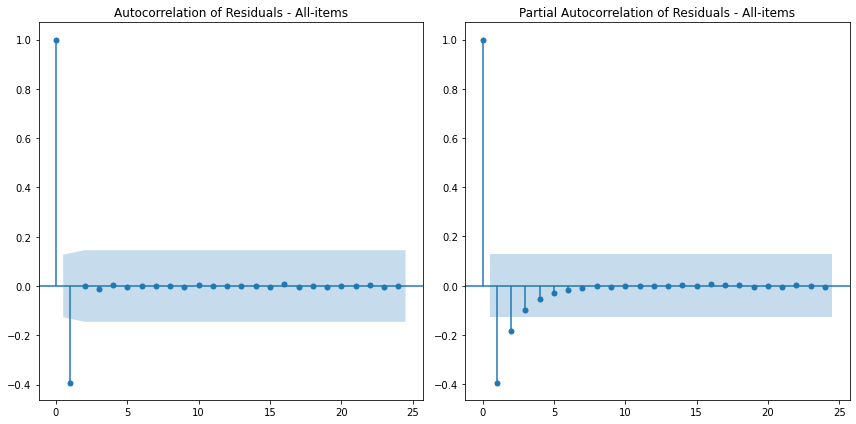

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


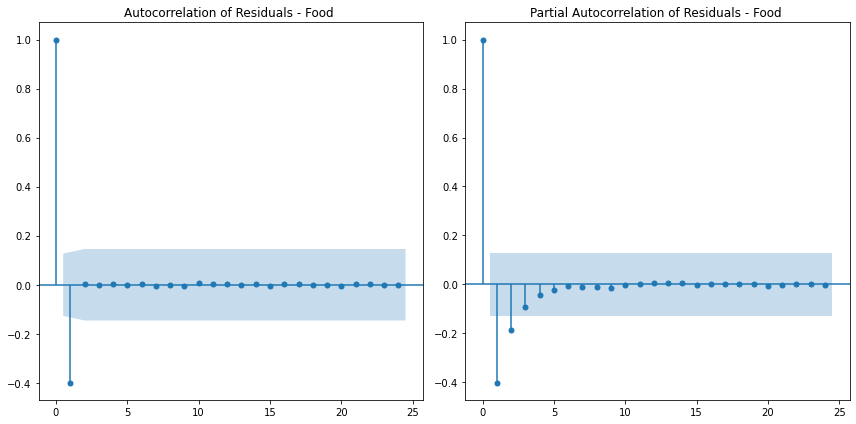

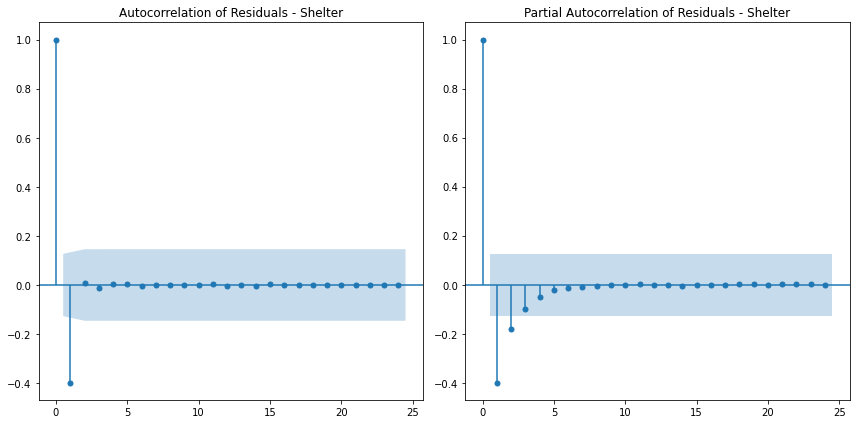

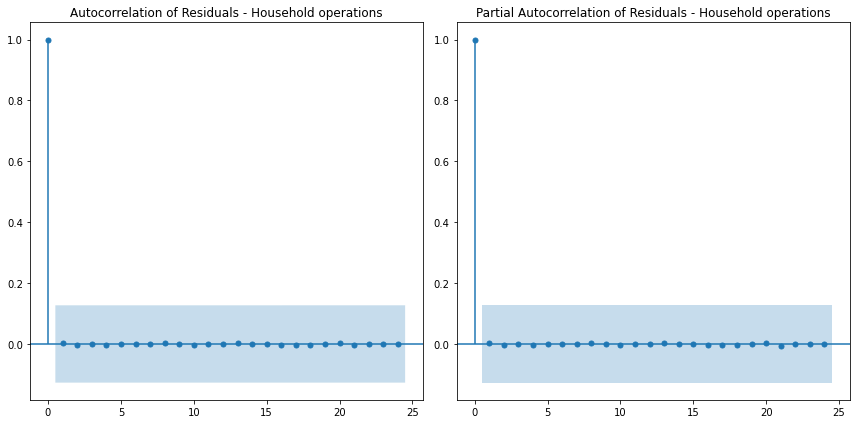

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


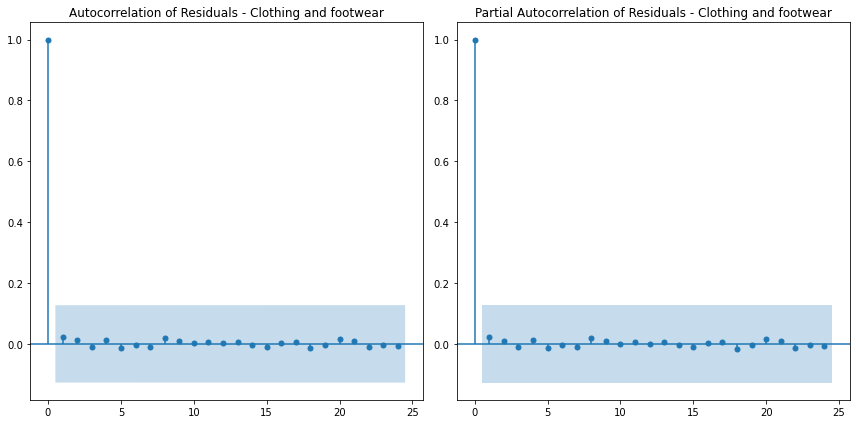

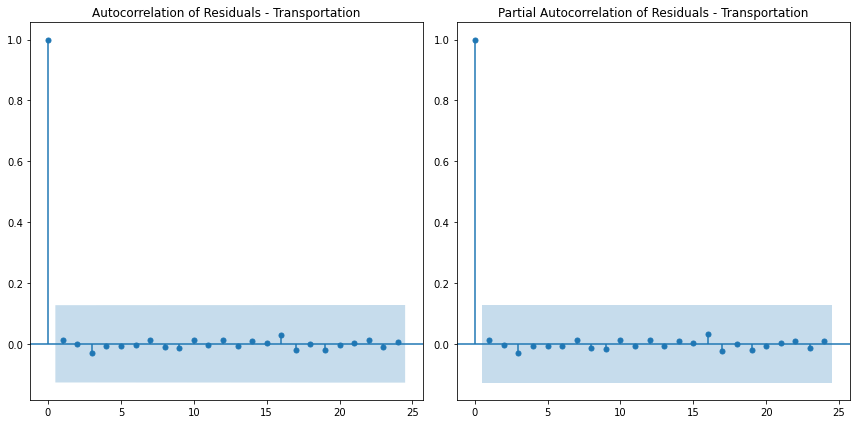

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


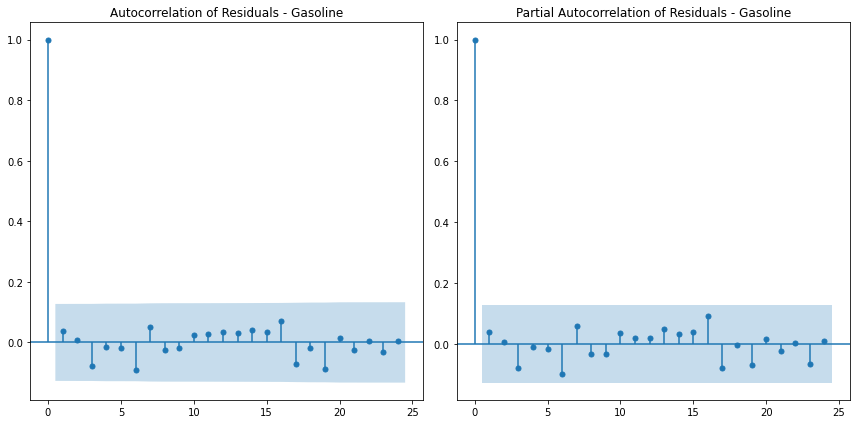

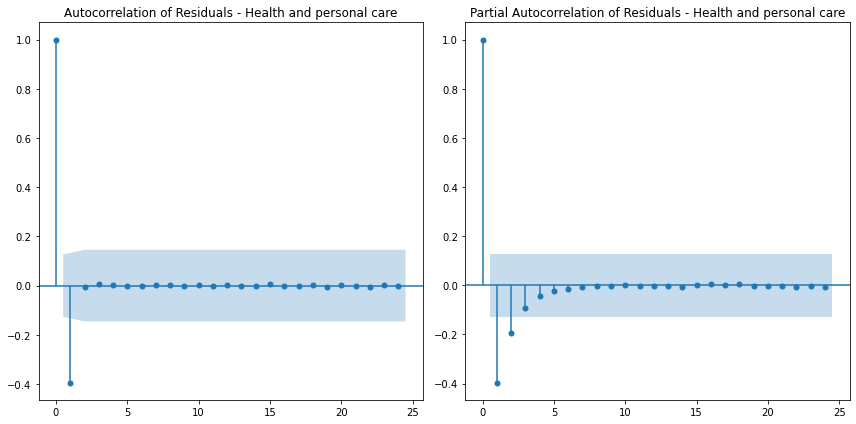

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


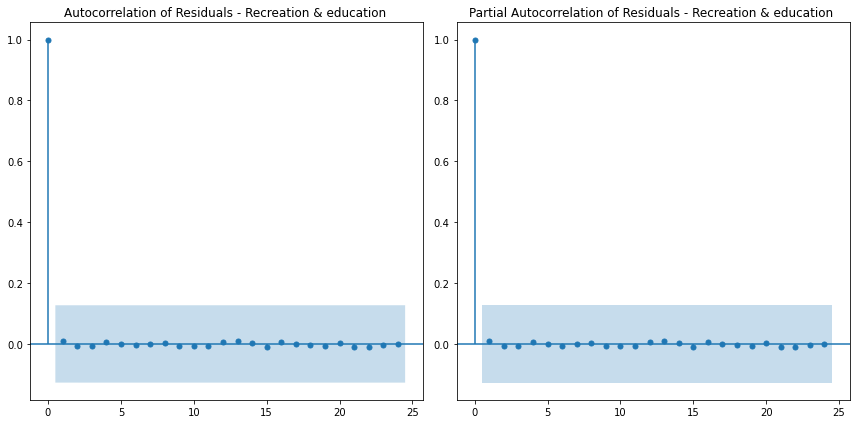

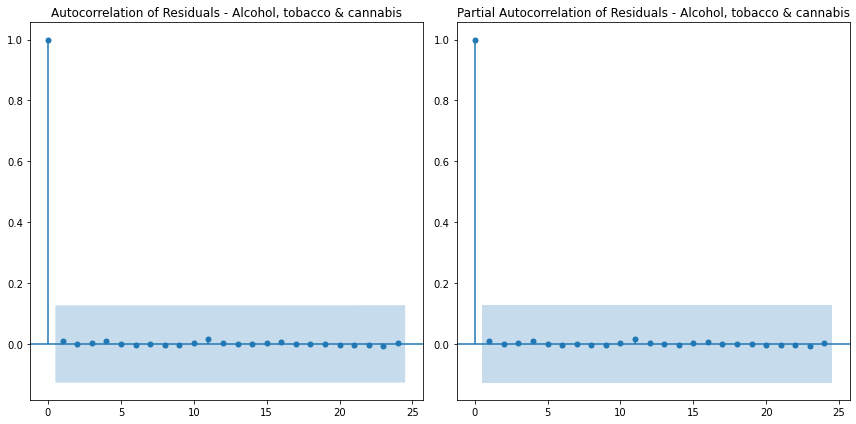

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


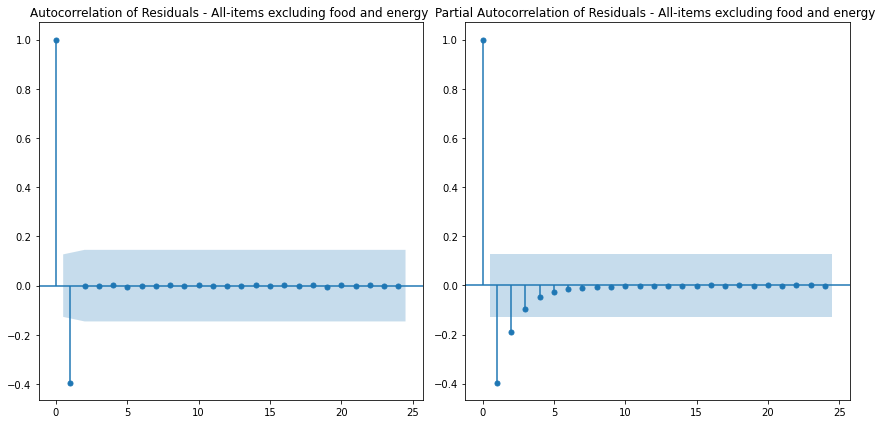

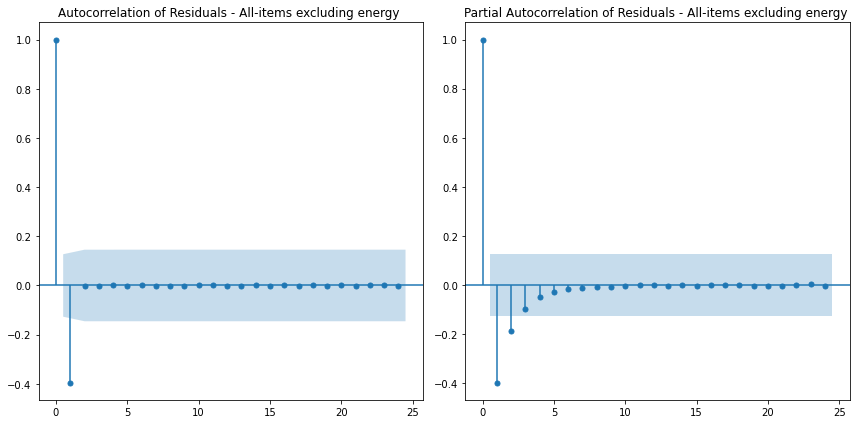

C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Owner\OneDrive\Documents\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


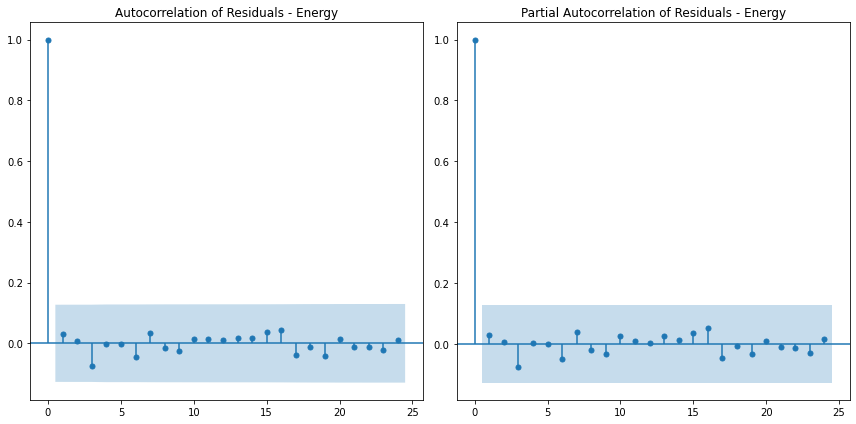

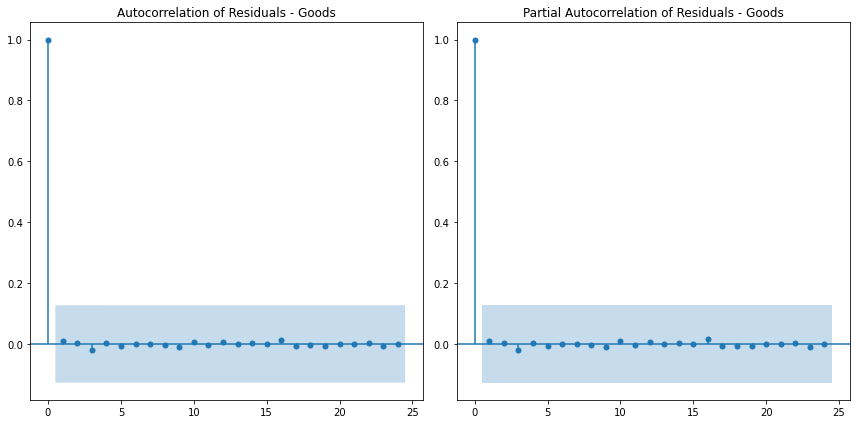

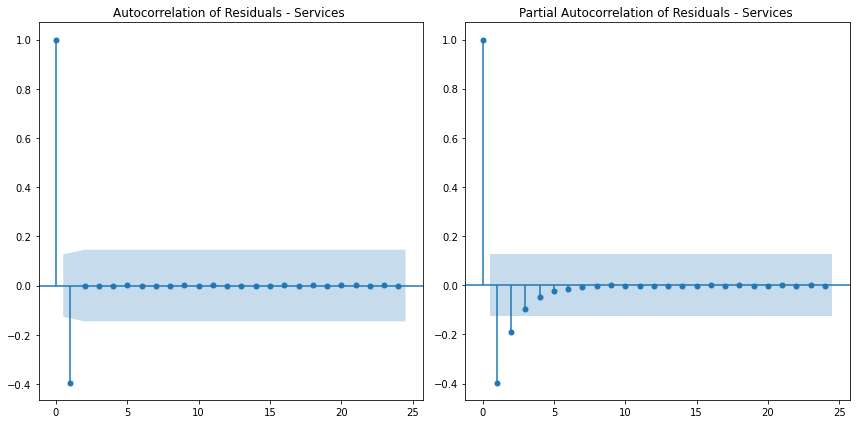

RMSE: 10.428945119889367
MAE: 4.855244432224668
SMAPE: 2.4175443874387437
R2 Score: -2.3526664621605864


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pmdarima import auto_arima

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")
data = data.dropna()

# Extract the features and target variables
features = data.drop(['Date'], axis=1)
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Split the data into features (X) and target (y)
X = features.values
y = target_data.values

# Split the data into training and testing sets
X_train, X_test = X[:238, :], X[238:, :]
y_train, y_test = y[:238, :], y[238:, :]

# Check for stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f' {key}: {value}')

# Loop through each component and check stationarity
for component in target_columns:
    print(f'Component: {component}')
    check_stationarity(y_train[:, target_columns.index(component)])
    print()

    ts = data[component]
    model = auto_arima(ts, seasonal=False)
    print(f"Summary for {component}:\n{model.summary()}\n")

# ARIMA orders
arima_orders = {
    'All-items': (0, 2, 2),  
    'Food ':(5, 2, 5),
    'Shelter':(0, 2, 1), 
    'Household operations':(0, 1, 0),
    'Clothing and footwear':(4, 1, 4),
    'Transportation':(0, 1, 1), 
    'Gasoline':(1, 1, 2), 
    'Health and personal care':(0, 2, 2), 
    'Recreation & education ':(2, 1, 4),
    'Alcohol, tobacco & cannabis':(0, 1, 0), 
    'All-items excluding food and energy ':(2, 2, 2),
    'All-items excluding energy ':(0, 2, 1), 
    'Energy':(1, 1, 2), 
    'Goods':(0, 1, 1),
    'Services ':(0, 2, 1) 
}

forecast_results = {}
for component in target_columns:
    order = arima_orders[component]

    # Fit the ARIMA model
    arima_model = ARIMA(y_train[:, target_columns.index(component)], order=order)
    arima_model_fit = arima_model.fit()

    residuals = arima_model_fit.resid
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_acf(residuals, ax=plt.gca())
    plt.title(f'Autocorrelation of Residuals - {component}')
    plt.subplot(1, 2, 2)
    plot_pacf(residuals, ax=plt.gca())
    plt.title(f'Partial Autocorrelation of Residuals - {component}')
    plt.tight_layout()
    plt.show()

    forecast = arima_model_fit.forecast(steps=len(X_test))
    forecast_results[component] = forecast

X_test_df = pd.DataFrame(X_test, columns=features.columns)
forecast_df = pd.DataFrame(forecast_results, index=X_test_df.index)

# Evaluate model performance
arima_mae = mean_absolute_error(y_test, forecast_df.values)
arima_rmse = np.sqrt(mean_squared_error(y_test, forecast_df.values))
arima_r2 = r2_score(y_test, forecast_df.values)

def smape(y_true, y_pred):
    return 2 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

smape_score = smape(y_test, forecast_df.values)
print('RMSE:', arima_rmse)
print('MAE:', arima_mae)
print('SMAPE:', smape_score)
print('R2 Score:', arima_r2)


### Lasso Regressor 

In [5]:
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")
data = data.dropna()  # Drop rows with missing values

# Extract the features and target variables
features = data.drop(['Date'], axis=1)
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Split the data into features (X) and target (y)
X = features.values
y = target_data.values

# Define the number of months for training and testing
train_months = 238
test_months = 6

# Split the data into training and testing sets
X_train, X_test = X[:train_months], X[-test_months:]
y_train, y_test = y[:train_months], y[-test_months:]

# Initialize and train the stacking regressor with Lasso regressor
lasso_regressor = Lasso(alpha=0.1)  
stacked_regressor = MultiOutputRegressor(lasso_regressor)
stacked_regressor.fit(X_train, y_train)
# Make predictions using the stacked regressor
y_pred_stacked = stacked_regressor.predict(X_test)

# Evaluate model performance
lasso_mae = mean_absolute_error(y_test, y_pred_stacked)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
lasso_r2 = r2_score(y_test, y_pred_stacked)

# SMAPE calculation
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape_score = smape(y_test, y_pred_stacked)

# Print evaluation metrics
print('RMSE:', lasso_rmse)
print('MAE:', lasso_mae)
print('SMAPE:', smape_score)
print('R2 Score:', lasso_r2)


RMSE: 0.40493997697906864
MAE: 0.2853438379528514
SMAPE: 0.16536560136522488
R2 Score: 0.9315306379832805


C:\Users\Owner\OneDrive\Documents\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.685e+01, tolerance: 8.345e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\OneDrive\Documents\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.219e+01, tolerance: 5.439e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\OneDrive\Documents\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

### Support Vector Regressor 

In [10]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load and preprocess the data 
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")
data = data.dropna()

# Extract the features and target variables
features = data.drop(['Date'], axis=1)
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Split the data into features (X) and target (y)
X = features.values
y = target_data.values

# Define the number of months for training and testing
train_months = 238
test_months = 6

# Split the data into training and testing sets
X_train, X_test = X[:train_months], X[-test_months:]
y_train, y_test = y[:train_months], y[-test_months:]

# Initialize SVR models for each target variable
svr_models = [SVR(kernel='linear') for _ in range(y_train.shape[1])]

# Train SVR models for each target variable
for i, svr_model in enumerate(svr_models):
    svr_model.fit(X_train, y_train[:, i])

# Make predictions using the SVR models
y_pred = np.column_stack([svr_model.predict(X_test) for svr_model in svr_models])

# Calculate SMAPE for each target variable
def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

smape_scores = [smape(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

# Calculate overall evaluation metrics
svr_mae = mean_absolute_error(y_test, y_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
svr_r2 = r2_score(y_test, y_pred)
overall_smape = np.mean(smape_scores)

# Print overall evaluation metrics
print('Overall SVR Model Performance:')
print('RMSE:', svr_rmse.mean())
print('MAE:', svr_mae.mean())
print('SMAPE:', overall_smape)
print('R2 Score:', svr_r2.mean())



Overall SVR Model Performance:
RMSE: 0.2922859343811436
MAE: 0.20626288223914424
SMAPE: 0.13525049696688504
R2 Score: 0.995417762292238


### Random Forest Regressor 

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load and preprocess the data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")
data = data.dropna()  # Drop rows with missing values

# Extract the features and target variables
features = data.drop(['Date'], axis=1)  # Use all columns except 'Date' as features
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Initialize dictionaries to store results
rf_rmse_results = {}
rf_mae_results = {}
rf_r2_results = {}

# Loop through each target column
for target_column in target_columns:
    y = target_data[target_column].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features.values, y, test_size=0.023, random_state=101)

    # Build a Random Forest Regressor model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=101)  
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Evaluate Random Forest Regressor model performance
    rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rf_mae = mean_absolute_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)

    # Store results in dictionaries
    rf_rmse_results[target_column] = rf_rmse
    rf_mae_results[target_column] = rf_mae
    rf_r2_results[target_column] = rf_r2
    
    # SMAPE calculation
    def smape(y_true, y_pred):
        return 200 * np.mean(np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))
    

# Calculate average performance metrics
rf_rmse = np.mean(list(rf_rmse_results.values()))
rf_mae = np.mean(list(rf_mae_results.values()))
rf_r2 = np.mean(list(rf_r2_results.values()))
rf_smape = smape(y_test, y_pred)
# Print the results
print('Random Forest Regressor Model Performance:')
print('RMSE:', rf_rmse)
print('MAE:', rf_mae)
print('SMAPE:', rf_smape)
print('R2 Score:', rf_r2)


Random Forest Regressor Model Performance:
RMSE: 1.549036509749606
MAE: 0.7897222222222092
SMAPE: 0.11401109140175003
R2 Score: 0.9952671608468907


### Artificial Neural Network

In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess the CPI data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")

# Preprocess the dates
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = (data['Date'] - data['Date'].min()).dt.days

# Extract the features and target variables
features = data['Date']
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Data Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.values.reshape(-1, 1))
scaled_target = scaler.fit_transform(target_data.values)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.023, random_state=101)

# Building the Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),  # Input layer
    tf.keras.layers.Dense(180, activation='relu'),  # Hidden layer with relu activation
    tf.keras.layers.Dense(180, activation='relu'),  # Another hidden layer with relu  activation
    tf.keras.layers.Dense(len(target_columns))    # Output layer
])

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the Model
history = model.fit(X_train, y_train, epochs=500, batch_size=2, validation_data=(X_test, y_test))

# Evaluate the Model
predictions = model.predict(X_test)
predictions_denormalized = scaler.inverse_transform(predictions)
target_denormalized = scaler.inverse_transform(y_test)

mae = mean_absolute_error(target_denormalized, predictions_denormalized)
rmse = np.sqrt(mean_squared_error(target_denormalized, predictions_denormalized))

smape_values = np.mean(np.abs(target_denormalized - predictions_denormalized) / 
                       (np.abs(target_denormalized) + np.abs(predictions_denormalized))) * 100
smape_average = np.mean(smape_values)

r2 = r2_score(target_denormalized, predictions_denormalized)

print("Evaluation metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("SMAPE:", smape_average)
print("R2 Score:", r2)




Epoch 1/500
119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - mae: 0.3763 - val_loss: 0.4044 - val_mae: 0.3218
Epoch 2/500
119/119 [==============================] - 0s 1ms/step - loss: 0.1486 - mae: 0.2291 - val_loss: 0.2309 - val_mae: 0.2207
Epoch 3/500
119/119 [==============================] - 0s 967us/step - loss: 0.1246 - mae: 0.2118 - val_loss: 0.2620 - val_mae: 0.2206
Epoch 4/500
119/119 [==============================] - 0s 909us/step - loss: 0.1127 - mae: 0.1994 - val_loss: 0.2477 - val_mae: 0.2036
Epoch 5/500
119/119 [==============================] - 0s 971us/step - loss: 0.1084 - mae: 0.1966 - val_loss: 0.1916 - val_mae: 0.1993
Epoch 6/500
119/119 [==============================] - 0s 967us/step - loss: 0.1060 - mae: 0.1944 - val_loss: 0.2016 - val_mae: 0.1795
Epoch 7/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0982 - mae: 0.1845 - val_loss: 0.2992 - val_mae: 0.2317
Epoch 8/500
119/119 [==============================] - 0s 960

Epoch 62/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0670 - mae: 0.1370 - val_loss: 0.1617 - val_mae: 0.1653
Epoch 63/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0678 - mae: 0.1406 - val_loss: 0.1302 - val_mae: 0.1528
Epoch 64/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0651 - mae: 0.1343 - val_loss: 0.1260 - val_mae: 0.1489
Epoch 65/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0665 - mae: 0.1355 - val_loss: 0.1456 - val_mae: 0.1667
Epoch 66/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0682 - mae: 0.1416 - val_loss: 0.2646 - val_mae: 0.2245
Epoch 67/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0712 - mae: 0.1438 - val_loss: 0.0966 - val_mae: 0.1275
Epoch 68/500
119/119 [==============================] - 0s 906us/step - loss: 0.0699 - mae: 0.1468 - val_loss: 0.1066 - val_mae: 0.1415
Epoch 69/500
119/119 [==============================] - 0s 9

119/119 [==============================] - 0s 907us/step - loss: 0.0552 - mae: 0.1242 - val_loss: 0.0880 - val_mae: 0.1279
Epoch 183/500
119/119 [==============================] - 0s 914us/step - loss: 0.0544 - mae: 0.1205 - val_loss: 0.1475 - val_mae: 0.1472
Epoch 184/500
119/119 [==============================] - 0s 897us/step - loss: 0.0552 - mae: 0.1225 - val_loss: 0.0759 - val_mae: 0.1247
Epoch 185/500
119/119 [==============================] - 0s 922us/step - loss: 0.0561 - mae: 0.1244 - val_loss: 0.1004 - val_mae: 0.1282
Epoch 186/500
119/119 [==============================] - 0s 920us/step - loss: 0.0608 - mae: 0.1322 - val_loss: 0.0946 - val_mae: 0.1292
Epoch 187/500
119/119 [==============================] - 0s 902us/step - loss: 0.0565 - mae: 0.1256 - val_loss: 0.0819 - val_mae: 0.1257
Epoch 188/500
119/119 [==============================] - 0s 969us/step - loss: 0.0549 - mae: 0.1216 - val_loss: 0.1008 - val_mae: 0.1335
Epoch 189/500
119/119 [==============================] 

119/119 [==============================] - 0s 1ms/step - loss: 0.0540 - mae: 0.1197 - val_loss: 0.1067 - val_mae: 0.1352
Epoch 243/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0537 - mae: 0.1191 - val_loss: 0.0833 - val_mae: 0.1282
Epoch 244/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0519 - mae: 0.1156 - val_loss: 0.0955 - val_mae: 0.1356
Epoch 245/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0553 - mae: 0.1196 - val_loss: 0.0940 - val_mae: 0.1326
Epoch 246/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0528 - mae: 0.1188 - val_loss: 0.1093 - val_mae: 0.1675
Epoch 247/500
119/119 [==============================] - 0s 984us/step - loss: 0.0546 - mae: 0.1249 - val_loss: 0.0913 - val_mae: 0.1308
Epoch 248/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0502 - mae: 0.1138 - val_loss: 0.1092 - val_mae: 0.1499
Epoch 249/500
119/119 [==============================] - 0s 1ms/ste

119/119 [==============================] - 0s 1ms/step - loss: 0.0530 - mae: 0.1169 - val_loss: 0.0667 - val_mae: 0.1097
Epoch 363/500
119/119 [==============================] - 0s 917us/step - loss: 0.0532 - mae: 0.1196 - val_loss: 0.0681 - val_mae: 0.1154
Epoch 364/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0523 - mae: 0.1194 - val_loss: 0.0750 - val_mae: 0.1236
Epoch 365/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0490 - mae: 0.1126 - val_loss: 0.0740 - val_mae: 0.1275
Epoch 366/500
119/119 [==============================] - 0s 972us/step - loss: 0.0488 - mae: 0.1094 - val_loss: 0.1076 - val_mae: 0.1423
Epoch 367/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0509 - mae: 0.1160 - val_loss: 0.0791 - val_mae: 0.1373
Epoch 368/500
119/119 [==============================] - 0s 971us/step - loss: 0.0500 - mae: 0.1118 - val_loss: 0.0928 - val_mae: 0.1382
Epoch 369/500
119/119 [==============================] - 0s 940

119/119 [==============================] - 0s 1ms/step - loss: 0.0451 - mae: 0.1036 - val_loss: 0.0738 - val_mae: 0.1119
Epoch 483/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0511 - mae: 0.1166 - val_loss: 0.0648 - val_mae: 0.1118
Epoch 484/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0494 - mae: 0.1116 - val_loss: 0.0889 - val_mae: 0.1223
Epoch 485/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0474 - mae: 0.1084 - val_loss: 0.0706 - val_mae: 0.1165
Epoch 486/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0487 - mae: 0.1091 - val_loss: 0.0496 - val_mae: 0.0968
Epoch 487/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0491 - mae: 0.1106 - val_loss: 0.0675 - val_mae: 0.1273
Epoch 488/500
119/119 [==============================] - 0s 1ms/step - loss: 0.0482 - mae: 0.1095 - val_loss: 0.0683 - val_mae: 0.1118
Epoch 489/500
119/119 [==============================] - 0s 1ms/step 


### Convolutional LSTM

In [54]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess the CPI data
data = pd.read_csv(r"C:\Users\Owner\Downloads\MRP\CPI\CPI_Monthly_2003_2023_updated.csv")

# Preprocess the dates
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = (data['Date'] - data['Date'].min()).dt.days

# Extract the features and target variables
features = data['Date']
target_columns = ['All-items', 'Food ', 'Shelter', 'Household operations',
       'Clothing and footwear', 'Transportation', 'Gasoline',
       'Health and personal care', 'Recreation & education ',
       'Alcohol, tobacco & cannabis', 'All-items excluding food and energy ',
       'All-items excluding energy ', 'Energy', 'Goods', 'Services ']
target_data = data[target_columns]

# Data Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.values.reshape(-1, 1))
scaled_target = scaler.fit_transform(target_data.values)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.3, random_state=42)

# Reshape data for ConvLSTM
n_samples, n_timesteps, n_features = X_train.shape[0], 1, X_train.shape[1]
X_train = X_train.reshape((n_samples, n_timesteps, 1, n_features, 1))
n_samples_test = X_test.shape[0]
X_test = X_test.reshape((n_samples_test, n_timesteps, 1, n_features, 1))

# Build the Convolutional LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.ConvLSTM2D(filters=120, kernel_size=(1, 3), activation='relu', input_shape=(n_timesteps, 1, n_features, 1), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=len(target_columns), activation='relu')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=4, validation_data=(X_test, y_test))

# Evaluate the Model
predictions = model.predict(X_test)
predictions_denormalized = scaler.inverse_transform(predictions)
target_denormalized = scaler.inverse_transform(y_test)

mae = mean_absolute_error(target_denormalized, predictions_denormalized)
rmse = np.sqrt(mean_squared_error(target_denormalized, predictions_denormalized))

smape_values = np.mean(np.abs(target_denormalized - predictions_denormalized) / 
                       (np.abs(target_denormalized) + np.abs(predictions_denormalized))) * 100
smape_average = np.mean(smape_values)

r2 = r2_score(target_denormalized, predictions_denormalized)

print("Evaluation metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("SMAPE:", smape_average)
print("R2 Score:", r2)


Epoch 1/500
43/43 [==============================] - 2s 7ms/step - loss: 0.9929 - val_loss: 0.9329
Epoch 2/500
43/43 [==============================] - 0s 3ms/step - loss: 0.9397 - val_loss: 0.8664
Epoch 3/500
43/43 [==============================] - 0s 3ms/step - loss: 0.8592 - val_loss: 0.7895
Epoch 4/500
43/43 [==============================] - 0s 3ms/step - loss: 0.7822 - val_loss: 0.7269
Epoch 5/500
43/43 [==============================] - 0s 3ms/step - loss: 0.7277 - val_loss: 0.6856
Epoch 6/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6963 - val_loss: 0.6651
Epoch 7/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6813 - val_loss: 0.6565
Epoch 8/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6746 - val_loss: 0.6520
Epoch 9/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6707 - val_loss: 0.6483
Epoch 10/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6685 - val_loss: 0.6472
Epoch 11/

43/43 [==============================] - 0s 3ms/step - loss: 0.6573 - val_loss: 0.6359
Epoch 84/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6568 - val_loss: 0.6349
Epoch 85/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6573 - val_loss: 0.6348
Epoch 86/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6567 - val_loss: 0.6349
Epoch 87/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6572 - val_loss: 0.6345
Epoch 88/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6567 - val_loss: 0.6342
Epoch 89/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6561 - val_loss: 0.6341
Epoch 90/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6568 - val_loss: 0.6337
Epoch 91/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6566 - val_loss: 0.6346
Epoch 92/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6568 - val_loss: 0.6336
Epoch 93/500


43/43 [==============================] - 0s 3ms/step - loss: 0.6408 - val_loss: 0.6209
Epoch 246/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6422 - val_loss: 0.6212
Epoch 247/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6422 - val_loss: 0.6204
Epoch 248/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6418 - val_loss: 0.6204
Epoch 249/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6414 - val_loss: 0.6202
Epoch 250/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6406 - val_loss: 0.6201
Epoch 251/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6407 - val_loss: 0.6201
Epoch 252/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6407 - val_loss: 0.6201
Epoch 253/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6414 - val_loss: 0.6223
Epoch 254/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6408 - val_loss: 0.6201
Epoc

43/43 [==============================] - 0s 4ms/step - loss: 0.6382 - val_loss: 0.6182
Epoch 408/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6379 - val_loss: 0.6181
Epoch 409/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6382 - val_loss: 0.6180
Epoch 410/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6382 - val_loss: 0.6181
Epoch 411/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6381 - val_loss: 0.6181
Epoch 412/500
43/43 [==============================] - 0s 4ms/step - loss: 0.6387 - val_loss: 0.6184
Epoch 413/500
43/43 [==============================] - 0s 4ms/step - loss: 0.6383 - val_loss: 0.6182
Epoch 414/500
43/43 [==============================] - 0s 4ms/step - loss: 0.6391 - val_loss: 0.6185
Epoch 415/500
43/43 [==============================] - 0s 4ms/step - loss: 0.6380 - val_loss: 0.6180
Epoch 416/500
43/43 [==============================] - 0s 3ms/step - loss: 0.6380 - val_loss: 0.6182
Epoc